In [385]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import re
import json

In [386]:
with open('li2.json','r') as fp:
    li2 = json.load(fp)

In [387]:
#li2 is tokenized and cleaned version of words of the sentences

In [388]:
li2[0]

['<name>',
 'know',
 'listenin',
 'bad',
 'habit',
 'earlier',
 'start',
 'freakin',
 'part']

In [389]:
oo = pd.DataFrame(li2)
df = pd.read_csv('data/tweet_emotions.csv')
oo['emotion']=df['sentiment']
oo

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,emotion
0,<name>,know,listenin,bad,habit,earlier,start,freakin,part,None,...,None,None,None,None,None,None,None,None,None,empty
1,layin,n,bed,headache,ugh,waitin,cal,None,None,None,...,None,None,None,None,None,None,None,None,None,sadness
2,funeral,ceremony,glomy,friday,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,sadness
3,want,hang,friend,son,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,enthusiasm
4,<name>,want,trade,someone,houston,ticket,one,wil,None,None,...,None,None,None,None,None,None,None,None,None,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,<name>,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,neutral
39996,hapy,mother,day,al,love,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,love
39997,hapy,mother's,day,al,momies,woman,man,long,moma,someone,...,None,None,None,None,None,None,None,None,None,love
39998,<name>,wasup,beautiful,folow,pep,new,hit,single,w,myspace,...,None,None,None,None,None,None,None,None,None,happiness


In [390]:
# droping the duplicates
oon = oo.drop_duplicates()
oon

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,emotion
0,<name>,know,listenin,bad,habit,earlier,start,freakin,part,None,...,None,None,None,None,None,None,None,None,None,empty
1,layin,n,bed,headache,ugh,waitin,cal,None,None,None,...,None,None,None,None,None,None,None,None,None,sadness
2,funeral,ceremony,glomy,friday,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,sadness
3,want,hang,friend,son,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,enthusiasm
4,<name>,want,trade,someone,houston,ticket,one,wil,None,None,...,None,None,None,None,None,None,None,None,None,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39994,sucesfuly,folowing,tayla,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,happiness
39996,hapy,mother,day,al,love,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,love
39997,hapy,mother's,day,al,momies,woman,man,long,moma,someone,...,None,None,None,None,None,None,None,None,None,love
39998,<name>,wasup,beautiful,folow,pep,new,hit,single,w,myspace,...,None,None,None,None,None,None,None,None,None,happiness


In [391]:
ool = oon.iloc[:,:-1]
ool

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,<name>,know,listenin,bad,habit,earlier,start,freakin,part,None,...,None,None,None,None,None,None,None,None,None,None
1,layin,n,bed,headache,ugh,waitin,cal,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,funeral,ceremony,glomy,friday,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,want,hang,friend,son,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,<name>,want,trade,someone,houston,ticket,one,wil,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39994,sucesfuly,folowing,tayla,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
39996,hapy,mother,day,al,love,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
39997,hapy,mother's,day,al,momies,woman,man,long,moma,someone,...,None,None,None,None,None,None,None,None,None,None
39998,<name>,wasup,beautiful,folow,pep,new,hit,single,w,myspace,...,None,None,None,None,None,None,None,None,None,None


In [392]:
v = ool.values
v

array([['<name>', 'know', 'listenin', ..., None, None, None],
       ['layin', 'n', 'bed', ..., None, None, None],
       ['funeral', 'ceremony', 'glomy', ..., None, None, None],
       ...,
       ['hapy', "mother's", 'day', ..., None, None, None],
       ['<name>', 'wasup', 'beautiful', ..., None, None, None],
       ['<name>', 'bulet', 'train', ..., None, None, None]], dtype=object)

In [393]:
vo =[]
for i in range(len(v)):
    vo.append((v[i][v[i]!=None]).tolist())

In [394]:
vo[0]

['<name>',
 'know',
 'listenin',
 'bad',
 'habit',
 'earlier',
 'start',
 'freakin',
 'part']

In [395]:
seql = pd.Series([len(x) for x in vo])

In [409]:
quant = seql.quantile([0.25,0.50,0.98])
quant

0.25     5.0
0.50     7.0
0.98    17.0
dtype: float64

In [406]:
max_size = max(len(x) for x in vo)
max_size

27

In [ ]:
# as we can the 98% of sequence lengths falls under 17, but max length is 27
# padding all the lengths to 33 will lead to redundancy 
# but padding only to the 17 lenth and truncating remaining tokens will also lead to loss of data

In [ ]:
# so, we will try to padd the sequences to 17-19

### padding the sequences

In [417]:
padded_sequences =[]
for i in vo:
    if(18-len(i)<0):
        j = i[:18]
        padded_sequences.append(j)
    else:
        j = i + (['<null>']*(18-len(i)))
        padded_sequences.append(j)

In [418]:
len(padded_sequences)

39049

In [419]:
x = padded_sequences
y = oon['emotion']

In [420]:
unique_class = y.unique()
num_classes=len(unique_class)
num_classes

13

In [421]:
unique_class

array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'],
      dtype=object)

In [422]:
xx = np.array(x)
yy = y.values

In [423]:
xx.shape,yy.shape

((39049, 18), (39049,))

In [424]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_int = le.fit_transform(yy)
y_int

array([ 2, 10, 10, ...,  7,  5,  7])

In [425]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(xx,y_int,test_size=0.4,random_state=42)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(23429, 18) (23429,)
(15620, 18) (15620,)


In [426]:
x_train[0],unique_class[y_train[0]]

(array(['sometimes', 'forget', 'boy', 'felings', '<null>', '<null>',
        '<null>', '<null>', '<null>', '<null>', '<null>', '<null>',
        '<null>', '<null>', '<null>', '<null>', '<null>', '<null>'],
       dtype='<U39'),
 'boredom')

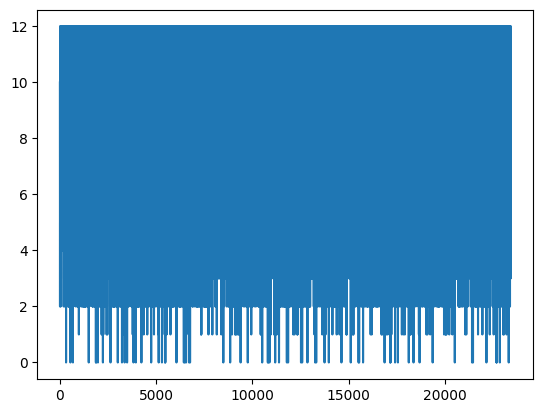

In [427]:
plt.plot(y_train)

In [428]:
x_val,x_test,y_val,y_test = train_test_split(x_test,y_test,test_size=0.5,random_state=42)
print(x_val.shape,y_val.shape)
print(x_test.shape,y_test.shape) 

(7810, 18) (7810,)
(7810, 18) (7810,)


### Hybrid sampling

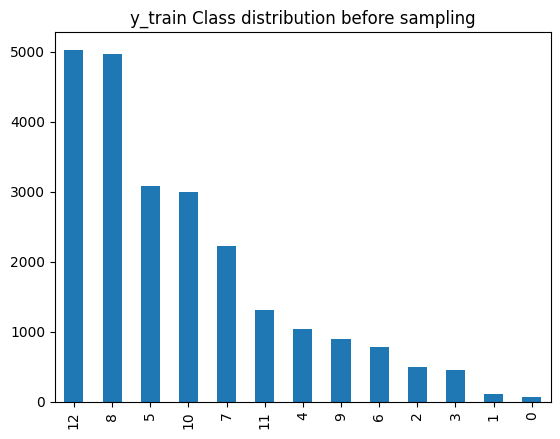

In [429]:
class_dist = pd.Series(y_train).value_counts()
class_dist.plot(kind='bar')
plt.title("y_train Class distribution before sampling")
plt.show()

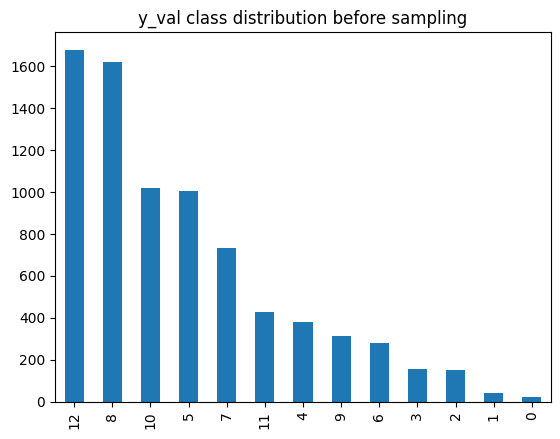

In [430]:
class_y = pd.Series(y_val).value_counts()
class_y.plot(kind='bar')
plt.title("y_val class distribution before sampling")
plt.show()

In [431]:
freq = pd.Series(y_train).value_counts()
freq

12    5029
8     4972
5     3075
10    2999
7     2219
11    1308
4     1042
9      896
6      777
2      491
3      448
1      104
0       69
Name: count, dtype: int64

In [432]:
freq1 = {}
freq2 = {}
for i,j in enumerate(freq):
    if(j<777):
        freq1[freq.index[i]]=800
    elif(j>3075):
        freq2[freq.index[i]]=3075
freq1,freq2

({2: 800, 3: 800, 1: 800, 0: 800}, {12: 3075, 8: 3075})

In [433]:
freq0 = pd.Series(y_val).value_counts()
freq0

12    1677
8     1618
10    1018
5     1003
7      731
11     426
4      381
9      311
6      278
3      155
2      152
1       39
0       21
Name: count, dtype: int64

In [435]:
freq11 = {}
freq22 = {}
for i,j in enumerate(freq0):
    if(j<278):
        freq11[freq0.index[i]]=278
    elif(j>1018):
        freq22[freq0.index[i]]=1018
freq11,freq22

({3: 278, 2: 278, 1: 278, 0: 278}, {12: 1018, 8: 1018})

In [436]:
# there are many ways to balance the classes, 
# 1) as there is high imbalance in our data, we will try class_weights and check whether it is yielding good results
# 2) oversampling using smote and undersampling using randomsampler

In [437]:
"""
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight='balanced',classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))
"""

"\nfrom sklearn.utils.class_weight import compute_class_weight\nclass_weights = compute_class_weight(class_weight='balanced',classes=np.unique(y_train), y=y_train)\nclass_weights = dict(enumerate(class_weights))\n"

In [438]:
#oversampling using smote or Randomundersampler
#from imblearn.over_sampling import SMOTE

from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy=freq1, random_state=42)
X_res, y_res = oversample.fit_resample(x_train, y_train)

oversample1 = RandomOverSampler(sampling_strategy=freq11, random_state=42)
X_val, Y_val = oversample1.fit_resample(x_val,y_val) 

In [439]:
# Note: Don't use smote for generating data for sensual data like tokenized words, because generating synthetic data could be non-sensical 

In [440]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy=freq2,random_state=42)
X_train_resampled, y_train_resampled = undersample.fit_resample(X_res, y_res)

undersample1 = RandomUnderSampler(sampling_strategy=freq22,random_state=42)
X_val_resampled, y_val_resampled = undersample1.fit_resample(X_val, Y_val) 

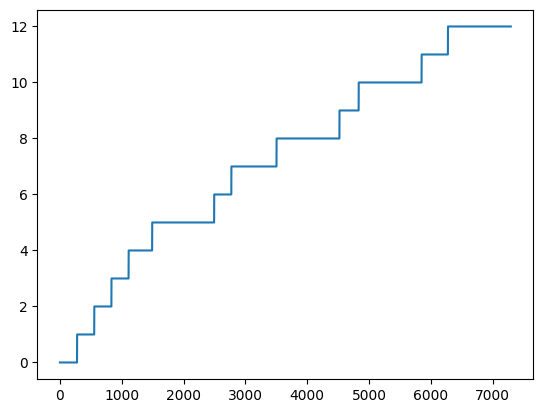

In [441]:
plt.plot(y_val_resampled)

In [442]:
from sklearn.utils import shuffle
X_train_resampled, y_train_resampled = shuffle(X_train_resampled,y_train_resampled,random_state=42)
X_val_resampled, y_val_resampled = shuffle(X_val_resampled, y_val_resampled,random_state=42)

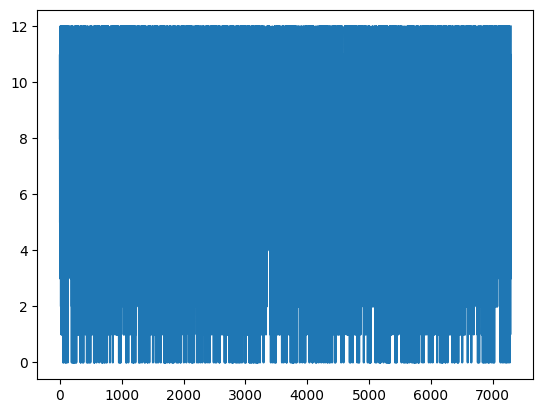

In [443]:
plt.plot(y_val_resampled)

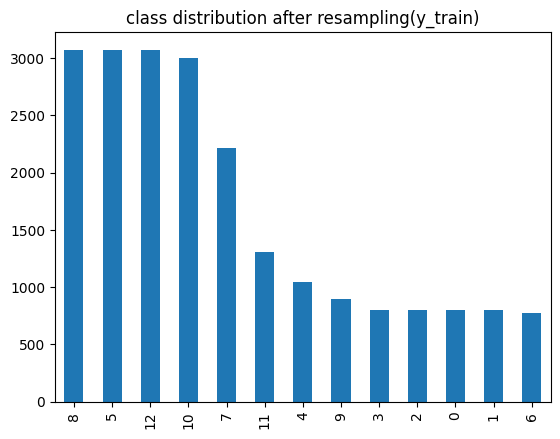

In [444]:
class_dist = pd.Series(y_train_resampled).value_counts()
class_dist.plot(kind='bar')
plt.title("class distribution after resampling(y_train)")
plt.show()

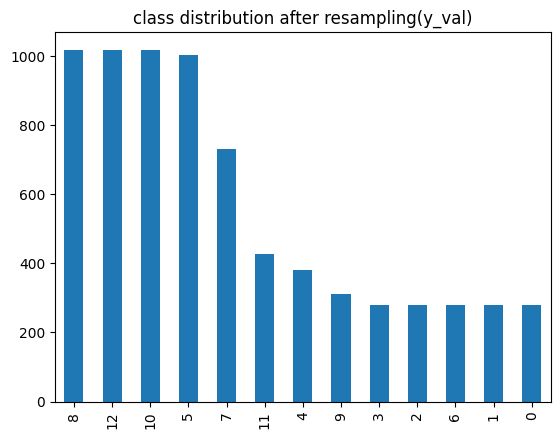

In [445]:
class_dist = pd.Series(y_val_resampled).value_counts()
class_dist.plot(kind='bar')
plt.title("class distribution after resampling(y_val)")
plt.show()

In [446]:
pd.Series(y_train_resampled).value_counts()

8     3075
5     3075
12    3075
10    2999
7     2219
11    1308
4     1042
9      896
3      800
2      800
0      800
1      800
6      777
Name: count, dtype: int64

In [447]:
pd.Series(y_val_resampled).value_counts() 

8     1018
12    1018
10    1018
5     1003
7      731
11     426
4      381
9      311
3      278
2      278
6      278
1      278
0      278
Name: count, dtype: int64

In [448]:
# largesample/samplesample = k
# if k>5, high imbalance
# if k<5, mild imbalance

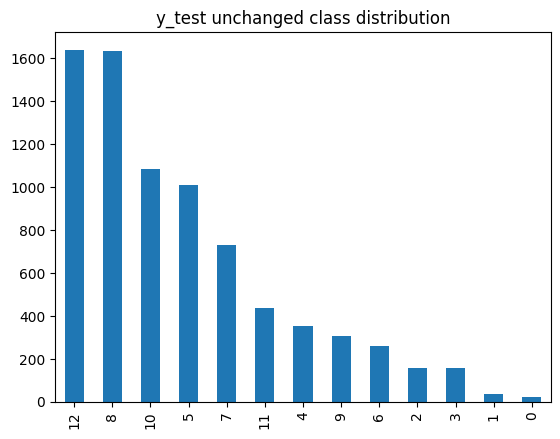

In [449]:
class_dist = pd.Series(y_test).value_counts()
class_dist.plot(kind='bar')
plt.title("y_test unchanged class distribution")
plt.show()

In [450]:
#Note: Generating more random samples may lead to overfitting

In [451]:
x_train.shape,X_train_resampled.shape # we observe there is an decrease or increase in the sample

((23429, 18), (21666, 18))

In [452]:
x_val.shape,X_val_resampled.shape # we observe there is an decrease or increase in the sample

((7810, 18), (7296, 18))

In [453]:
#Note: Oversampling more will lead to redundancy in the data which may leads to overfitting
# Becautious

In [454]:
#len(X_train_resampled)-len(np.unique(X_train_resampled,axis=0)),len(X_val_resampled)-len(np.unique(X_val_resampled,axis=0))
# this indicates there are duplicates in the array

In [455]:
df_train = pd.DataFrame(X_train_resampled)
df_train['emotion']=y_train_resampled
df_train 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,emotion
0,<name>,ops,eldhose,bhai,upload,read,hindu's,article,barcamp,biny,rock,man,<null>,<null>,<null>,<null>,<null>,<null>,3
1,sit,wait,go,gym,almost,leave,realize,never,charge,ipod,trip,wisconsin,dead,<null>,<null>,<null>,<null>,<null>,8
2,write,mild,wild,article,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,8
3,orangepineaplebanana,smothie,long,hard,day,heaven,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,5
4,<name>,must,kid,boy,definatelyi,hope,anyway,oo,girl,probably,honest,must,proper,ugly,noone,like,<null>,<null>,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21661,<name>,nope,come,back,ct,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,8
21662,<name>,lol,pr,america,lmao,dont,like,theres,nothing,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,12
21663,friday,gota,work,tomorow,tho,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,5
21664,god,morning,twiters,tired,realy,ned,2,stay,twiter,lol,shit,take,life,lol,<null>,<null>,<null>,<null>,1


In [456]:
df_traino = df_train.drop_duplicates()
df_traino

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,emotion
0,<name>,ops,eldhose,bhai,upload,read,hindu's,article,barcamp,biny,rock,man,<null>,<null>,<null>,<null>,<null>,<null>,3
1,sit,wait,go,gym,almost,leave,realize,never,charge,ipod,trip,wisconsin,dead,<null>,<null>,<null>,<null>,<null>,8
2,write,mild,wild,article,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,8
3,orangepineaplebanana,smothie,long,hard,day,heaven,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,5
4,<name>,must,kid,boy,definatelyi,hope,anyway,oo,girl,probably,honest,must,proper,ugly,noone,like,<null>,<null>,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21660,wonder,actualy,wek,fuk,al,bar,pack,pep,r,leavin,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,8
21661,<name>,nope,come,back,ct,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,8
21662,<name>,lol,pr,america,lmao,dont,like,theres,nothing,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,12
21663,friday,gota,work,tomorow,tho,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,5


In [457]:
df_val = pd.DataFrame(X_val_resampled)
df_val['emotion']=y_val_resampled
df_val

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,emotion
0,grad,present,photo,facebok,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,8
1,bil,compton,wi,can't,twiter,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,11
2,<name>,make,friend,real,life,internet,ever,level,people,comfortable,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,5
3,<name>,love,sausage,kitchenfire,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,7
4,<name>,washing,comp,great,people,fab,atmosphere,1st,dist,2nd,exp,s,<null>,<null>,<null>,<null>,<null>,<null>,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7291,wat,stresful,wek,jus,hope,everything,fals,place,4me,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,10
7292,<name>,yea,fun,dive,bit,scary,sometimes,fun,u,like,dive,<null>,<null>,<null>,<null>,<null>,<null>,<null>,10
7293,lot,catch,wekend,bhr,host,ben,busy,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,10
7294,<name>,oh,yay,ben,forevs,since,last,tv,bake,diner,god,yumy,prawn,x,<null>,<null>,<null>,<null>,3


In [458]:
df_valo = df_val.drop_duplicates()
df_valo

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,emotion
0,grad,present,photo,facebok,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,8
1,bil,compton,wi,can't,twiter,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,11
2,<name>,make,friend,real,life,internet,ever,level,people,comfortable,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,5
3,<name>,love,sausage,kitchenfire,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,7
4,<name>,washing,comp,great,people,fab,atmosphere,1st,dist,2nd,exp,s,<null>,<null>,<null>,<null>,<null>,<null>,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7290,watch,et,today,lt3,suposed,clip,new,mon,hat,drag,hel,<null>,<null>,<null>,<null>,<null>,<null>,<null>,8
7291,wat,stresful,wek,jus,hope,everything,fals,place,4me,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,10
7292,<name>,yea,fun,dive,bit,scary,sometimes,fun,u,like,dive,<null>,<null>,<null>,<null>,<null>,<null>,<null>,10
7293,lot,catch,wekend,bhr,host,ben,busy,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,10


In [459]:
indexo = list(df_traino.index)
indexa = list(df_train.index)
indexd = []
for i in indexa:
    if(i not in indexo):
        indexd.append(i)

indexov = list(df_valo.index)
indexav = list(df_val.index)
indexdv = []
for i in indexav:
    if(i not in indexov):
        indexdv.append(i)

In [460]:
len(indexd),len(indexdv)

(2088, 745)

In [461]:
df_traind = df_train.iloc[indexd]
df_traind

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,emotion
100,im,pain,ben,stod,fet,15hrs,nursing,hard,love,gorgeous,evening,xxx,<null>,<null>,<null>,<null>,<null>,<null>,3
291,<name>,always,fel,guilty,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,0
353,<name>,always,fel,guilty,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,0
459,<name>,hopefuly,go,far,sometimes,fel,like,renounce,rot,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,0
541,<name>,always,fel,guilty,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21636,<name>,voc,que,sumiu,forever,msn,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,3
21638,confuzled,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,0
21639,headache,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,3
21651,stomach,al,explode,wendys,everything,taste,god,bad,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,0


In [462]:
df_traind.value_counts()

0       1       2       3           4        5       6         7       8        9        10      11      12      13      14      15      16      17      emotion
gah     leave   glases  work        reading  give    headache  can't   believe  much     ned     day     old     age     <null>  <null>  <null>  <null>  0          21
<name>  get     gona    go          upto     bed     sec       drink   i'm      disgust  haha    <null>  <null>  <null>  <null>  <null>  <null>  <null>  0          19
        dude    hax     0r          1        put     final     cut     pro      tel      stable  <null>  <null>  <null>  <null>  <null>  <null>  <null>  0          16
        awh     thats   god         get      beter   son       <null>  <null>   <null>   <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  0          16
big     laptop  big     time        switch   ee      bye       big     guy      <null>   <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  0          15
    

In [463]:
df_vald = df_val.iloc[indexdv]
df_vald

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,emotion
93,<name>,thats,another,sponsor,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,1
127,<name>,everything,fault,moxy,everything,x,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,0
237,<name>,oh,let,clarify,know,lot,nice,people,live,think,always,breding,ground,4,bnp,<null>,<null>,<null>,0
243,thingsmumysaid,mumy,tell,never,wnted,mumy,ever,live,wid,dad,think,al,confuse,<null>,<null>,<null>,<null>,<null>,0
260,finaly,home,dope,wek,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7261,<name>,mb,ben,cryopreserved,may,return,future,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,1
7276,<name>,<name>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,2
7278,thingsmumysaid,mumy,tell,never,wnted,mumy,ever,live,wid,dad,think,al,confuse,<null>,<null>,<null>,<null>,<null>,0
7286,<name>,beast,enough,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,1


In [464]:
df_vald.value_counts()

0        1           2          3        4           5          6          7       8        9        10      11      12       13      14      15      16      17      emotion
<name>   ack         read       show     that's      horible    acounting  taste   <null>   <null>   <null>  <null>  <null>   <null>  <null>  <null>  <null>  <null>  0          18
         everything  fault      moxy     everything  x          <null>     <null>  <null>   <null>   <null>  <null>  <null>   <null>  <null>  <null>  <null>  <null>  0          18
i'm      way         slepy      il       watch       show       lata       god     nite     twitfam  god     bles    xoxo     <null>  <null>  <null>  <null>  <null>  0          17
finaly   home        dope       wek      <null>      <null>     <null>     <null>  <null>   <null>   <null>  <null>  <null>   <null>  <null>  <null>  <null>  <null>  0          16
arduous  task        acomplish  work     stuf        already    ben        do      amp      usual    eithe

In [465]:
# now we found duplicate data from the resampled data
# And we will be applying augumentation techniques to it, to maintain the variability in the data

In [466]:
X_train_resampled_dup = df_traind.iloc[:,:-1].values.tolist()
y_train_resampled_dup = df_traind.iloc[:,-1]
X_val_resampled_dup = df_vald.iloc[:,:-1].values.tolist()
y_val_resampled_dup = df_vald.iloc[:,-1]

In [467]:
# leave them as numpy array
X_train_resampled_o = df_traino.iloc[:,:-1]
y_train_resampled_o = df_traino.iloc[:,-1]
X_val_resampled_o = df_valo.iloc[:,:-1]
y_val_resampled_o = df_valo.iloc[:,-1]

In [468]:
print(len(X_train_resampled_o),"+",len(X_train_resampled_dup),len(X_train_resampled))
print(len(y_train_resampled_o),"+",len(y_train_resampled_dup),len(y_train_resampled))
print(len(X_val_resampled_o),"+",len(X_val_resampled_dup),len(X_val_resampled))
print(len(y_val_resampled_o),"+",len(y_val_resampled_dup),len(y_val_resampled))

19578 + 2088 21666
19578 + 2088 21666
6551 + 745 7296
6551 + 745 7296


In [469]:
# Now our data looks kinda balanced

# Note: the highest classes frequency shouldn't be more than 5 times more than the lowest class frequency, otherwise it is high imbalance, 
# >5 high imbalance,<5 moderate imbalance, <3 balance

In [470]:
# As we see there is lot of increase in the sample, as random samples increase the size the duplicating the data
# So, to mitigate it, we will do data agumentation like replacing the words with similar meaning word to increase the variablility in the data

### Data Agumentation (only for duplicate data)

In [471]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vivek\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\vivek\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [472]:
from nltk.corpus import wordnet
import random
word = 'happy'
synonyms = wordnet.synsets(word)
synonyms

[Synset('happy.a.01'),
 Synset('felicitous.s.02'),
 Synset('glad.s.02'),
 Synset('happy.s.04')]

In [473]:
# Replacing the words with thier synonyms

In [474]:
from nltk.corpus import wordnet
import random


# method1 (manually replacing words using nltk)

exceptions = ['an','An','be','Be','in','In','am','Am','a','A','it','It','i','I','as','As']
def augument(words):
    lii = []
    for word in words:
        li =[]
        synonyms = wordnet.synsets(word)
        if(len(synonyms)!=0 and word not in exceptions):
            for i in range(len(synonyms)):
                synonym = synonyms[i].lemmas()[0].name()
                if(synonym!=word):
                    li.append(synonym)
            if(len(li)!=0):
                lii.append(random.choice(li)) 
            else: lii.append(word)
        else:
            lii.append(word)
    return lii


"""
# method2 (using nlpaug library)
import nlpaug.augmenter.word as naw
import nltk
nltk.download('averaged_perceptron_tagger_eng')
#Initialize the augmenter for synonym replacement
stopwords = ['an','An','be','Be','in','In','am','Am','a','A','it','It','i','I','as','As','<null>','[name]']
synonym_aug = naw.SynonymAug(aug_src='wordnet',stopwords=stopwords)

def augument(words):
    str = " ".join(words)
    syn = synonym_aug.augment(str)
    return syn[0].split()
"""

x_train_augument = []
x_val_augument = []
for i in range(len(X_train_resampled_dup)):
    tempx = augument(X_train_resampled_dup[i])
    x_train_augument.append(tempx)
    
for i in range(len(X_val_resampled_dup)):
    tempxv = augument(X_val_resampled_dup[i])
    x_val_augument.append(tempxv)

In [475]:
len(x_train_augument),len(x_val_augument)

(2088, 745)

In [477]:
# Repeating synonymn replacement

x_train_augument1 = []
x_val_augument1 = []
for i in range(len(x_train_augument)):
    tempx = augument(x_train_augument[i])
    x_train_augument1.append(tempx)
    
for i in range(len(x_val_augument)):
    tempxv = augument(x_val_augument[i])
    x_val_augument1.append(tempxv)

In [478]:
"""
insertion_aug = naw.ContextualWordEmbsAug(action="insert",model_path='bert-base-uncased',top_k=5,stopwords=stopwords)
sample = insertion_aug.augment("i love eating mushrooms and samosas in theb ")
sample
"""

'\ninsertion_aug = naw.ContextualWordEmbsAug(action="insert",model_path=\'bert-base-uncased\',top_k=5,stopwords=stopwords)\nsample = insertion_aug.augment("i love eating mushrooms and samosas in theb ")\nsample\n'

In [479]:
"""
import re
import concurrent.futures
import nlpaug.augmenter.word as naw

# Define the augmentation and cleaning function
def augment_and_clean(sentence):
    augmented_sentence = insertion_aug.augment(" ".join(sentence))
    return func(augmented_sentence[0])[0].split()

def func(x):
    li = []
    x = re.sub(r'([?!.,])\1+', r'\1', x)
    x = re.sub(r'[^a-zA-Z0-9\s\!\?\,\@\']','',x)
    x = re.sub(r'\w*null | tested |\s*test| \s*non','',x)
    x = re.sub(r'\s*UNK',' [name]',x)
    li.append(x)
    return li

# List of sentences to augment
x_train_augument1 = []

# Run in parallel with a thread pool
with concurrent.futures.ThreadPoolExecutor(max_workers=5) as executor:
    results = list(executor.map(augment_and_clean, x_train_augument))

x_train_augument1.extend(results)
"""

'\nimport re\nimport concurrent.futures\nimport nlpaug.augmenter.word as naw\n\n# Define the augmentation and cleaning function\ndef augment_and_clean(sentence):\n    augmented_sentence = insertion_aug.augment(" ".join(sentence))\n    return func(augmented_sentence[0])[0].split()\n\ndef func(x):\n    li = []\n    x = re.sub(r\'([?!.,])\x01+\', r\'\x01\', x)\n    x = re.sub(r\'[^a-zA-Z0-9\\s\\!\\?\\,\\@\']\',\'\',x)\n    x = re.sub(r\'\\w*null | tested |\\s*test| \\s*non\',\'\',x)\n    x = re.sub(r\'\\s*UNK\',\' [name]\',x)\n    li.append(x)\n    return li\n\n# List of sentences to augment\nx_train_augument1 = []\n\n# Run in parallel with a thread pool\nwith concurrent.futures.ThreadPoolExecutor(max_workers=5) as executor:\n    results = list(executor.map(augment_and_clean, x_train_augument))\n\nx_train_augument1.extend(results)\n'

In [480]:
# swapping the words 

In [481]:
import nlpaug.augmenter.word as naw

def custom_tokenizer(text):
    # Merge contractions
    text = re.sub(r"(\w)'(\w)", r"\1'\2", text)
    text = re.sub(r'\[name]','[name]',text)
    tokens = text.split()
    return tokens
    
swap_aug = naw.RandomWordAug(action="swap",tokenizer=custom_tokenizer)
swap_aug.augment("i [name] love eating mushrooms and samosas in the beach and it's very hot ")

["I [name] love mushrooms eating and samosas in the beach and very hot it's"]

In [482]:
# swapping the words in the sentences for more variability

def swap(sentences):
    ll =[]
    for words in sentences:
        str=""
        for i,j in enumerate(words):
            if(i==0):
                str+=j
            else:
                if(j!='<null>'):
                    str+=" "+j
                else: break 
        ss=swap_aug.augment(str)
        ss = ss[0]
        ll.append(ss.split())
    return ll

x_train_augument1 = swap(x_train_augument1)
x_val_augument1 = swap(x_val_augument1)

In [483]:
# swapping agian 
x_train_augument1 = swap(x_train_augument1)
x_val_augument1= swap(x_val_augument1)

In [484]:
print(x_train_augument[100])

['<name>', 'kh', 'matter', "i'l", 'weabo', 'stil', 'choose', 'English', "i'm", 'impatient', 'haha', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>']


In [485]:
print(x_train_augument1[100])

['<name>', 'kh', "i'l", 'topic', 'stil', 'weabo', "i'm", 'choose', 'impatient', 'haha', 'English']


In [486]:
print(x_val_augument[12])

['<name>', 'May', 'stil', 'wish', 'learn', 'diagnose', 'a_lot', 'blackhawks', 'Canuck', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>']


In [487]:
print(x_val_augument1[12])

['Whitethorn', '<name>', 'stil', 'regard', 'diagnose', 'blackhawks', 'memorize', 'a_lot', 'Canuck']


In [488]:
x_train_augument1 = [i + ['<null>']*(len(x_train_augument[0])-len(i)) for i in x_train_augument1]
x_val_augument1 = [i + ['<null>']*(len(x_val_augument[0])-len(i)) for i in x_val_augument1]

In [489]:
# reframing them to dataframe to see the value_counts

In [490]:
len(x_train_augument1),len(y_train_resampled_dup)

(2088, 2088)

In [491]:
len(x_val_augument1),len(y_val_resampled_dup)

(745, 745)

In [505]:
df_train_final = pd.DataFrame(x_train_augument1)
df_train_final['emotion'] = list(y_train_resampled_dup)
df_val_final = pd.DataFrame(x_val_augument1)
df_val_final['emotion']=  list(y_val_resampled_dup)

In [506]:
df_train_final.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,emotion
0,ben,perturb,im,stod,15hrs,field-effect_transistor,seaport,unmanageable,beloved,gorgeous,tied,thirty,<null>,<null>,<null>,<null>,<null>,<null>,3
1,Constantly,<name>,guilty,fel,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,0
2,constantly,<name>,guilty,fel,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,0
3,hopefuly,fail,<name>,fel,Army_for_the_Liberation_of_Rwanda,sometimes,abdicate,corruption,regard,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,0
4,Guilty,constantly,<name>,fel,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,0


In [507]:
df_train_final.value_counts().head(10)

0               1        2       3       4       5       6       7       8       9       10      11      12      13      14      15      16      17      emotion
<name>          shesh    <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  0          11
confuzled       <null>   <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  0          10
<name>          bo       <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  1           9
Motherfuck      qw       <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  0           8
Sleep_together  rest     <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  0           6
Im  

In [508]:
temp1 = np.array(df_train_final[df_train_final[0]=='confuzled'].head(1))
temp4 = np.array(df_train_final[df_train_final[0]=='Sleep_together'].head(1))
temp2 = np.array(df_train_final[df_train_final[1]=="shesh"].head(1))
temp3 =  np.array(df_train_final[df_train_final[0]=="Motherfuck"].head(1))
temp5 =  np.array(df_train_final[df_train_final[1]=="bo"].head(1))

In [509]:
df_train_final = df_train_final[df_train_final[0]!='confuzled']
df_train_final = df_train_final[df_train_final[0]!="Sleep_together"]
df_train_final = df_train_final[df_train_final[1]!="shesh"]
df_train_final = df_train_final[df_train_final[0]!="Motherfuck"]
df_train_final = df_train_final[df_train_final[1]!="bo"]

In [510]:
df_train_final.value_counts().head()

0               1        2        3       4       5       6       7       8       9       10      11      12      13      14      15      16      17      emotion
mcfly           <null>   <null>   <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  0          5
Im              sleping  <null>   <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  1          5
I'm             bore     <null>   <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  1          4
sleep_together  rest     <null>   <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  0          4
<name>          thats    terible  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  1          4
Nam

In [511]:
temp = [temp1,temp2,temp3,temp4,temp5]

In [512]:
for i in temp:
    df_train_final = pd.concat([df_train_final,pd.DataFrame(i,columns=df_train_final.columns)])

In [515]:
len(df_train_final)

2042

In [516]:
len(df_val_final)

745

In [517]:
df_val_final.value_counts().head()

0                       1             2               3       4       5       6       7       8       9       10      11      12      13      14      15      16      17      emotion
<name>                  react         <null>          <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  0          6
Software_documentation  sidereal_day  <null>          <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  1          5
<name>                  solution      <null>          <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  0          5
                        bally         hordies         <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  0          4
download                newfangled    baptismal_font  <null>  <null>  

In [519]:
temp12 = np.array(df_val_final[df_val_final[1]=='react'].head(1))

In [520]:
df_val_final = df_val_final[df_val_final[1]!="react"]

In [521]:
df_val_final.value_counts().head()

0                       1             2               3       4       5       6       7       8       9       10      11      12      13      14      15      16      17      emotion
<name>                  solution      <null>          <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  0          5
Software_documentation  sidereal_day  <null>          <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  1          5
<name>                  bally         hordies         <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  0          4
download                newfangled    baptismal_font  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  0          2
False                   friday        <null>          <null>  <null>  

In [522]:
df_val_final = pd.concat([df_val_final,pd.DataFrame(temp12,columns=df_val_final.columns)])

In [523]:
len(df_val_final)

740

In [524]:
# Now we can see that there are all unique values, no duplicacy is found in the data

In [525]:
xtarg = df_train_final.iloc[:,:-1].values
ytarg = df_train_final.iloc[:,-1].values
xvarg = df_val_final.iloc[:,:-1].values
yvarg = df_val_final.iloc[:,-1].values

In [526]:
print(X_train_resampled_o.shape,xtarg.shape)
print(y_train_resampled_o.shape,ytarg.shape)
print(X_val_resampled_o.shape,xvarg.shape)
print(y_val_resampled_o.shape,yvarg.shape) 

(19578, 18) (2042, 18)
(19578,) (2042,)
(6551, 18) (740, 18)
(6551,) (740,)


In [527]:
X_train_resampled_m=np.vstack([X_train_resampled_o,xtarg])
y_train_resampled_m = np.hstack([y_train_resampled_o,ytarg])
X_val_resampled_m = np.vstack([X_val_resampled_o,xvarg])
y_val_resampled_m = np.hstack([y_val_resampled_o,yvarg])

In [528]:
y_train_resampled_m

array([3, 8, 8, ..., 0, 0, 1], dtype=object)

In [529]:
print(x_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)

(23429, 18) (23429,)
(7810, 18) (7810,)


In [530]:
print(X_train_resampled_m.shape,y_train_resampled_m.shape)
print(X_val_resampled_m.shape,y_val_resampled_m.shape)

(21620, 18) (21620,)
(7291, 18) (7291,)


In [531]:
def arraytolist(arr):
    li =[]
    for i in arr:
        li.append(list(i))
    return li

Xtl = arraytolist(X_train_resampled_m)
xvl = arraytolist(X_val_resampled_m)
xl = arraytolist(x_test)

In [532]:
z =[]
z.extend(Xtl)
z.extend(xvl)
z.extend(xl)
len(z)

36721

In [533]:
print(z[0])

['<name>', 'ops', 'eldhose', 'bhai', 'upload', 'read', "hindu's", 'article', 'barcamp', 'biny', 'rock', 'man', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>']


In [534]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(z)
encoded = tokenizer.texts_to_sequences(z)

In [535]:
print(encoded[0])

[2, 2107, 11309, 7998, 686, 186, 11310, 1273, 11311, 11312, 337, 135, 1, 1, 1, 1, 1, 1]


In [536]:
tokenizer.word_index.items()

dict_items([('<null>', 1), ('<name>', 2), ('get', 3), ('go', 4), ('day', 5), ("i'm", 6), ('god', 7), ('al', 8), ('love', 9), ('work', 10), ('like', 11), ('u', 12), ('today', 13), ('time', 14), ('lol', 15), ('im', 16), ('know', 17), ('think', 18), ('one', 19), ('hapy', 20), ('make', 21), ('realy', 22), ('want', 23), ('back', 24), ('wil', 25), ('se', 26), ('oh', 27), ("can't", 28), ('night', 29), ('new', 30), ('wel', 31), ('home', 32), ('come', 33), ('stil', 34), ('amp', 35), ('2', 36), ('thanks', 37), ('much', 38), ('great', 39), ('watch', 40), ('haha', 41), ('say', 42), ('ben', 43), ('ned', 44), ('fel', 45), ('last', 46), ('hope', 47), ('wish', 48), ('fun', 49), ('morning', 50), ('twiter', 51), ('bad', 52), ('tomorow', 53), ('sad', 54), ('would', 55), ('tonight', 56), ('wait', 57), ('sory', 58), ('try', 59), ('gona', 60), ('nice', 61), ('thing', 62), ("i'l", 63), ('right', 64), ('though', 65), ('beter', 66), ('slep', 67), ('take', 68), ('mis', 69), ('yeah', 70), ("that's", 71), ('wek',

In [537]:
vocab_size = len(tokenizer.word_index)+1
vocab_size # so, we have vocab_size unique words in our all combined sequence

26318

In [539]:
# after NER and augumentation, the number of unique words reduced from to 26318 , which significantly reduces overfitting of the model
# and good scope for generalization

### word vectors

In [540]:
# we will be using pretrained Glove to create word vectors for our sequences
# the file is downloaded locally, and we will find the corressponding word vector by mapping our words with it

In [541]:
# Load the GloVe embeddings
"""
import numpy as np
embedding_index = {}
embedding_dim = 100  # Dimension of the GloVe embeddings, adjust based on the complexity of the task and no.of words,sentences

with open('D:/ds/dl/rnn/archive/glove.6B.100d.txt', encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

# Create the embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

print("Embedding matrix shape:", embedding_matrix.shape) 
"""

'\nimport numpy as np\nembedding_index = {}\nembedding_dim = 100  # Dimension of the GloVe embeddings, adjust based on the complexity of the task and no.of words,sentences\n\nwith open(\'D:/ds/dl/rnn/archive/glove.6B.100d.txt\', encoding="utf8") as f:\n    for line in f:\n        values = line.split()\n        word = values[0]\n        coefs = np.asarray(values[1:], dtype=\'float32\')\n        embedding_index[word] = coefs\n\n# Create the embedding matrix\nembedding_matrix = np.zeros((vocab_size, embedding_dim))\nfor word, i in tokenizer.word_index.items():\n    embedding_vector = embedding_index.get(word)\n    if embedding_vector is not None:\n        embedding_matrix[i] = embedding_vector\n\nprint("Embedding matrix shape:", embedding_matrix.shape) \n'

In [542]:
# we will be using word2vec to train on our custom words and generate word vectors
# because glove may not containa all the word vectors, where the words will be unique to our data 

In [543]:
print(z[4])

['<name>', 'must', 'kid', 'boy', 'definatelyi', 'hope', 'anyway', 'oo', 'girl', 'probably', 'honest', 'must', 'proper', 'ugly', 'noone', 'like', '<null>', '<null>']


In [544]:
from gensim.models import Word2Vec

# Initialize and train the Word2Vec model
# Here, `size` is the embedding dimension, and `window` is the context window size
model = Word2Vec(sentences=z, vector_size=200, window=5, min_count=1, workers=4)

# Save the model for later use
model.save("word2vec.model")

In [545]:
#sample
model = Word2Vec.load("word2vec.model")
word_vector = model.wv["sad"]
word_vector

array([ 0.1142609 , -0.08492845, -0.68389577,  0.06920785,  0.93345094,
       -0.0444916 , -0.3193617 ,  0.7520978 ,  0.19811074,  0.30674306,
       -0.7690584 , -0.31792283,  0.85028714,  0.7698947 ,  0.57430875,
       -0.23507023, -0.49071193,  0.86445737,  0.15400785, -1.3825172 ,
        0.36593854, -0.44405574,  0.01300038,  0.37478313, -0.0305174 ,
       -0.34002638,  0.4391317 , -0.04457642, -0.28075936, -0.21673568,
        0.883596  ,  0.4422049 ,  0.28099525,  0.2526725 , -0.01540268,
        0.9335946 ,  0.20718502, -0.28937477, -0.65894824, -0.97481143,
       -0.05036252, -0.07220489,  0.06671853,  0.5439047 ,  0.9274766 ,
       -0.04813344, -0.39073157, -1.0301898 ,  0.5218446 ,  0.03145093,
        0.35688403, -0.67618513, -0.3583046 , -0.32506818, -0.07607041,
       -0.12527677, -0.24106045, -0.9221639 , -0.47783554, -0.05875571,
       -0.5215796 ,  0.41238186,  0.34647673,  0.23887444, -1.2798146 ,
        0.604043  , -0.44178298,  0.63305366, -0.63942486,  0.69

In [546]:
len(word_vector)

200

In [547]:
import random
embedding_matrix = np.zeros((vocab_size, 200))
model = Word2Vec.load("word2vec.model")
for i,ind in tokenizer.word_index.items():
    try:
        embedding_matrix[ind]=model.wv[i] 
    except:
        random_floats = [random.uniform(-3, 3) for i in range(200)]
        embedding_matrix[ind]=random_floats
embedding_matrix 

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.16141060e-01,  1.41166180e-01, -3.30398709e-01, ...,
        -1.02397788e+00,  2.18087867e-01, -1.99989051e-01],
       [ 3.94605964e-01, -3.15515280e-01, -8.92052054e-01, ...,
        -9.49694335e-01,  6.22118473e-01, -6.46514952e-01],
       ...,
       [ 4.36061615e-04,  8.99123144e-04, -5.27815707e-03, ...,
        -5.56576857e-03,  1.00548808e-02, -3.64894513e-03],
       [ 2.00771797e-03,  2.19848705e-03, -5.68276225e-03, ...,
        -2.14285101e-03, -3.42751184e-04, -4.82804701e-03],
       [ 7.32722366e-03, -4.15739277e-03, -1.80855505e-02, ...,
        -6.20087655e-03,  2.02584919e-02, -1.92502476e-02]])

In [548]:
embedding_matrix.shape

(26318, 200)

In [549]:
# the word vectors in embedded matrix are also stored in the same order as word_index 

In [550]:
len(encoded)

36721

In [551]:
l1= len(Xtl)
l2 = len(xvl)
l1,l2

(21620, 7291)

In [552]:
ll = l1+l2
ll

28911

In [553]:
ll-l2 

21620

In [554]:
len(encoded)-ll # y_test length

7810

In [555]:
x_train_final = encoded[:l1]
x_val_final = encoded[l1:ll]

In [556]:
x_train_final = np.array(x_train_final)
x_val_final = np.array(x_val_final)

In [557]:
from tensorflow.keras.utils import to_categorical
y_train_hot = to_categorical(y_train_resampled_m,num_classes=13)
y_test_hot = to_categorical(y_test,num_classes=13)
y_val_hot = to_categorical(y_val_resampled_m,num_classes=13)
y_train_hot.shape,y_val_hot.shape ,y_test_hot.shape

((21620, 13), (7291, 13), (7810, 13))

In [558]:
print(x_train_final.shape,y_train_hot.shape)
print(x_val_final.shape,y_val_hot.shape)
print(x_test.shape,y_test_hot.shape)

(21620, 18) (21620, 13)
(7291, 18) (7291, 13)
(7810, 18) (7810, 13)


In [559]:
x_train_final

array([[    2,  2107, 11309, ...,     1,     1,     1],
       [  260,    57,     4, ...,     1,     1,     1],
       [  280,  6371,  1810, ...,     1,     1,     1],
       ...,
       [ 5356,  5357,     1, ...,     1,     1,     1],
       [  292,  2986,  1237, ...,     1,     1,     1],
       [    2,   267,     1, ...,     1,     1,     1]])

In [560]:
# shuffle the data
from sklearn.utils import shuffle
x_train_final,y_train_hot = shuffle(x_train_final,y_train_hot,random_state=42)
x_val_final,y_val_hot = shuffle(x_val_final,y_val_hot,random_state=42)

In [561]:
x_train_final

array([[    2,   224,  6452, ...,     1,     1,     1],
       [    2,  3795,  1869, ...,     1,     1,     1],
       [   82,   233,   409, ...,     1,     1,     1],
       ...,
       [  132,  2709,    90, ...,     1,     1,     1],
       [    2,    59, 11624, ...,     1,     1,     1],
       [    3,  3061,   480, ...,     1,     1,     1]])

In [562]:
# Now all our data is ready and as well as the embedded matrix which is created by word2vec

In [563]:
pd.Series(y_train_resampled_m).value_counts()

8     3075
5     3075
12    3075
10    2999
7     2219
11    1308
4     1042
9      896
3      800
2      800
1      791
6      777
0      763
Name: count, dtype: int64

In [564]:
"""
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced',classes= np.unique(y_train_resampled_m), y=y_train_resampled_m) 
class_weight_dict = dict(enumerate(class_weights))
class_weight_dict
"""

"\nfrom sklearn.utils.class_weight import compute_class_weight\nclass_weights = compute_class_weight('balanced',classes= np.unique(y_train_resampled_m), y=y_train_resampled_m) \nclass_weight_dict = dict(enumerate(class_weights))\nclass_weight_dict\n"

### DL model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Dropout,Bidirectional,Dense,LeakyReLU,GRU,GlobalAveragePooling1D,LayerNormalization,LSTM,Flatten, MultiHeadAttention
from tensorflow.keras.regularizers import l1,l2

model = Sequential()
model.add(Embedding(input_dim=vocab_size,output_dim=200, weights=[embedding_matrix],trainable=False))

model.add(Bidirectional(GRU(64,return_sequences=True)))

model.add(Flatten()) 

model.add(Dense(128,kernel_regularizer=l2(0.005))) 
model.add(LeakyReLU(0.2)) # to avoid dead neurons
model.add(LayerNormalization()) 
model.add(Dropout(0.3))


model.add(Dense(num_classes,activation='softmax')) 

In [605]:
from tensorflow.keras.optimizers import Adam,SGD
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy']) # categorical_crossentropy for one-hot encoded lables

In [606]:
history = model.fit(x_train_final,y_train_hot,epochs=20,batch_size=16,validation_data=(x_val_final,y_val_hot)) 

Epoch 1/20
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.1574 - loss: 3.0732 - val_accuracy: 0.2238 - val_loss: 2.3280
Epoch 2/20
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 34s 25ms/step - accuracy: 0.2299 - loss: 2.2899 - val_accuracy: 0.2568 - val_loss: 2.2461
Epoch 3/20
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 33s 24ms/step - accuracy: 0.2476 - loss: 2.2482 - val_accuracy: 0.2655 - val_loss: 2.2037
Epoch 4/20
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 36s 26ms/step - accuracy: 0.2612 - loss: 2.2137 - val_accuracy: 0.2713 - val_loss: 2.2057
Epoch 5/20
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 33s 25ms/step - accuracy: 0.2599 - loss: 2.1931 - val_accuracy: 0.2657 - val_loss: 2.1962
Epoch 6/20
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 34s 25ms/step - accuracy: 0.2770 - loss: 2.1739 - val_accuracy: 0.2738 - val_loss: 2.2111
Epoch 7/20
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 32s 24ms/step - accuracy: 0.2834 - loss: 2.1550 - val_accuracy: 0.2788 - val_loss: 2.1891
Epoch 8/20
 727/1352 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.2935 -

KeyboardInterrupt: 

In [ ]:
# Layernormalization - Feautre wise normalization instead of batch wise 
# Keep values in standard range which increases the speed of computation 

In [632]:
type(history)

keras.src.callbacks.history.History

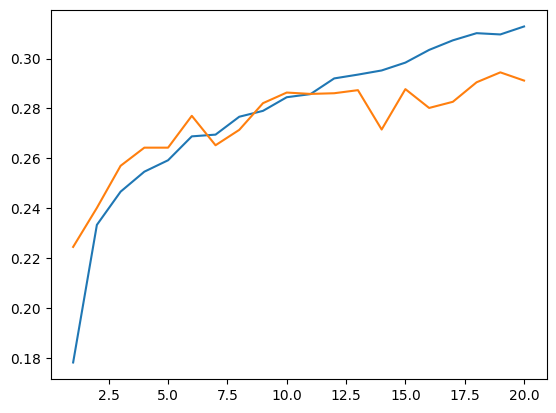

In [593]:
plt.plot([i for i in range(1,21)],history.history['accuracy'])
plt.plot([i for i in range(1,21)],history.history['val_accuracy'])
plt.show()

In [581]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)        │ (None, 18, 200)        │     5,263,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_21                │ (None, 18, 256)        │       253,440 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 32)             │       147,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_17 (LeakyReLU)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_26          │ (None, 32)             │            64 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 13)             │           429 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,467,865 (24.67 MB)

 Trainable params: 401,421 (1.53 MB)

 Non-trainable params: 5,263,600 (20.08 MB)

 Optimizer params: 802,844 (3.06 MB)

In [ ]:
x_testt = tokenizer.texts_to_sequences(x_test.tolist())
x_testt = np.array(x_testt)

In [341]:
# now evaluate on y_test (unseen data) (metrics: accuracy,precision,recall,f1-score)
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

y_pred = model.predict(x_testt)

248/248 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step


In [357]:
y_pred = np.argmax(y_pred,axis=1)
y_test = np.argmax(y_test_hot,axis=1)

In [363]:
acc = accuracy_score(y_pred,y_test)
precision = precision_score(y_pred,y_test, average='weighted')
recall = recall_score(y_pred,y_test, average='weighted')
f1 = f1_score(y_pred,y_test,average='weighted')

c:\Users\vivek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [364]:
acc,precision,recall,f1

(0.2891748675246026,
 0.3933474128762612,
 0.2891748675246026,
 0.32535759025265915)